c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	

Sto scaricando i dati...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\core.py:3035: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\core.py:3035: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be remov

Elaborazione e salvataggio dei dati...
Dati salvati in: output\2024_Miami_Grand_Prix_Race_comparison.csv


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\core.py:3035: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Giro 1.0:
  Settore 1: NaT
  Settore 2: 0 days 00:00:29.908000
  Settore 3: 0 days 00:00:28.623000
  Pilota precedente: VER
  Pilota successivo: RUS
------------------------------
Giro 2.0:
  Settore 1: 0 days 00:00:28.155000
  Settore 2: 0 days 00:00:29.728000
  Settore 3: 0 days 00:00:28.429000
  Pilota precedente: VER
  Pilota successivo: RUS
------------------------------
Giro 3.0:
  Settore 1: 0 days 00:00:27.933000
  Settore 2: 0 days 00:00:29.256000
  Settore 3: 0 days 00:00:28.530000
  Pilota precedente: VER
  Pilota successivo: RUS
------------------------------
Giro 4.0:
  Settore 1: 0 days 00:00:28.073000
  Settore 2: 0 days 00:00:29.438000
  Settore 3: 0 days 00:00:28.514000
  Pilota precedente: VER
  Pilota successivo: RUS
------------------------------
Giro 5.0:
  Settore 1: 0 days 00:00:28.042000
  Settore 2: 0 days 00:00:29.611000
  Settore 3: 0 days 00:00:28.613000
  Pilota precedente: VER
  Pilota successivo: RUS
------------------------------
Giro 6.0:
  Settore 1: 0

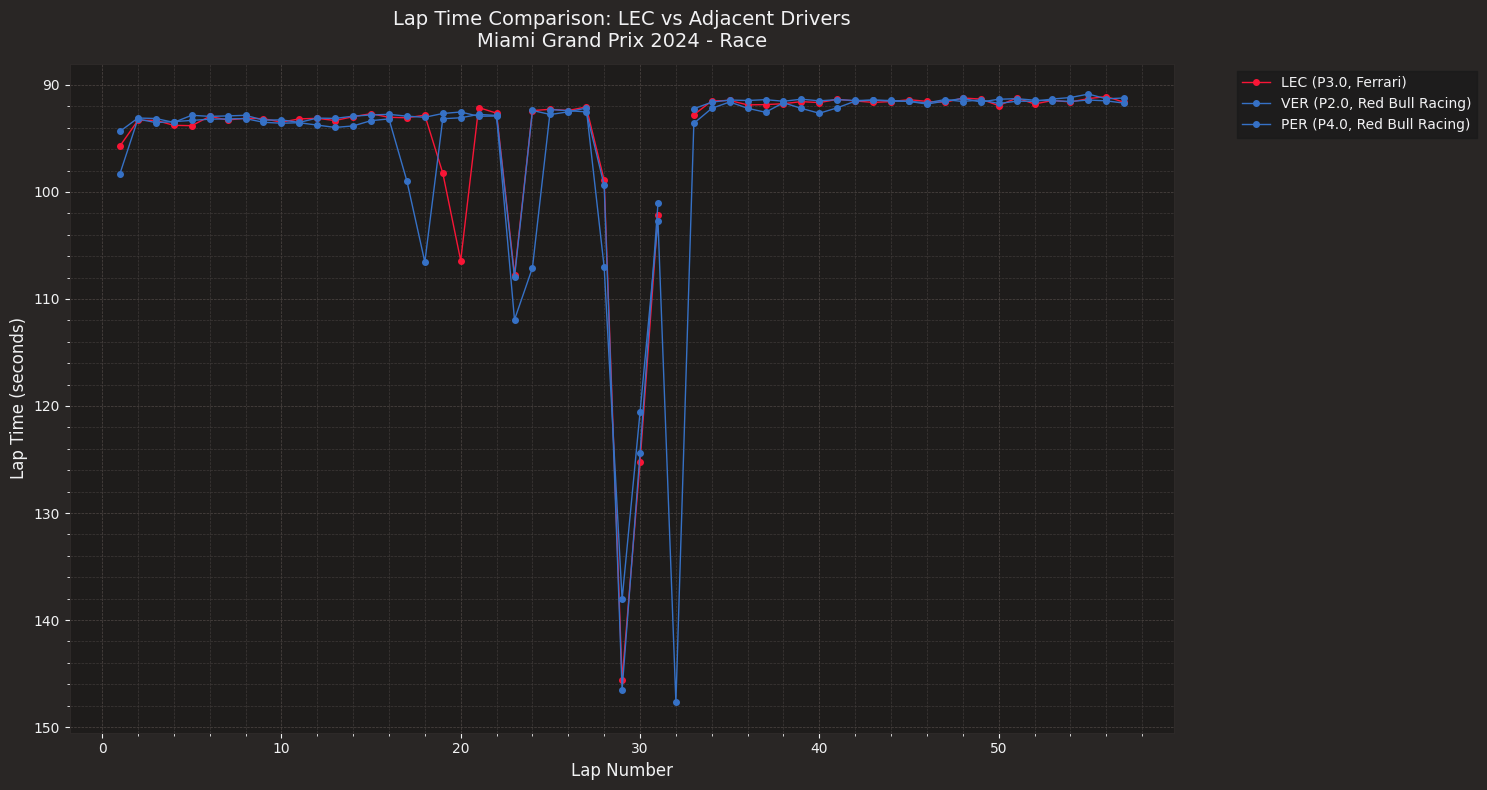

Analisi completata!


In [14]:
import fastf1 as ff1
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Configurazione iniziale
ff1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Abilita la cache per salvare i dati
fastf1.plotting.setup_mpl()

def get_team_color(team_name):
    """Restituisce il colore della scuderia"""
    team_colors = {
        'Mercedes': '#00D2BE',
        'Red Bull': '#3671C6',  # Updated color
        'Ferrari': '#F91536',   # Updated color
        'McLaren': '#FF8700',
        'Alpine': '#2293D1',    # Updated color
        'RB': '#3671C6',        # New AlphaTauri/Racing Bulls
        'Aston Martin': '#358C75',  # Updated color
        'Stake': '#C92D4B',    # New Alfa Romeo/Stake
        'Haas': '#FFFFFF',
        'Williams': '#005AFF'
    }
    # Try exact match first, then try partial match
    if team_name in team_colors:
        return team_colors[team_name]
    # Try to find a partial match (useful for team name variations)
    for key in team_colors:
        if key.lower() in team_name.lower() or team_name.lower() in key.lower():
            return team_colors[key]
    return '#000000'  # Default color if no match found

def get_driver_data(year, event_name, session_type, driver_code):
    """Ottiene i dati dei piloti target, ahead e behind"""
    session = fastf1.get_session(year, event_name, session_type)
    session.load()
    
    results = session.results
    results = results[['Position', 'Abbreviation', 'TeamName']].sort_values('Position')
    
    driver_row = results[results['Abbreviation'] == driver_code].iloc[0]
    driver_pos = driver_row['Position']
    
    ahead_driver = results[results['Position'] == driver_pos - 1].iloc[0] if driver_pos > 1 else None
    behind_driver = results[results['Position'] == driver_pos + 1].iloc[0] if driver_pos < len(results) else None
    
    # Ottieni i lap times per ogni pilota
    all_laps = session.laps
    
    driver_laps = all_laps.pick_driver(driver_code)[['LapNumber', 'LapTime', 'Team']]
    ahead_laps = all_laps.pick_driver(ahead_driver['Abbreviation'])[['LapNumber', 'LapTime', 'Team']] if ahead_driver is not None else None
    behind_laps = all_laps.pick_driver(behind_driver['Abbreviation'])[['LapNumber', 'LapTime', 'Team']] if behind_driver is not None else None
    
    return {
        'session': session,
        'target': {
            'code': driver_code,
            'position': driver_pos,
            'team': driver_row['TeamName'],
            'laps': driver_laps
        },
        'ahead': {
            'code': ahead_driver['Abbreviation'] if ahead_driver is not None else None,
            'position': driver_pos - 1 if ahead_driver is not None else None,
            'team': ahead_driver['TeamName'] if ahead_driver is not None else None,
            'laps': ahead_laps
        },
        'behind': {
            'code': behind_driver['Abbreviation'] if behind_driver is not None else None,
            'position': driver_pos + 1 if behind_driver is not None else None,
            'team': behind_driver['TeamName'] if behind_driver is not None else None,
            'laps': behind_laps
        }
    }

def merge_and_save_to_csv(data, output_dir='output'):
    """Unisce i dati in un singolo CSV organizzato per timestamp"""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    session = data['session']
    event_name = session.event['EventName']
    session_name = session.name
    year = session.event.year
    
    filename = f"{year}_{event_name.replace(' ', '_')}_{session_name.replace(' ', '_')}_comparison.csv"
    filepath = os.path.join(output_dir, filename)
    
    # Crea un DataFrame vuoto
    merged_df = pd.DataFrame()
    
    # Processa ogni pilota
    for driver_key in ['target', 'ahead', 'behind']:
        driver_data = data[driver_key]
        if driver_data['laps'] is not None and not driver_data['laps'].empty:
            # Crea una copia dei dati
            df = driver_data['laps'].copy()
            
            # Converti LapTime in secondi
            df['LapTime_seconds'] = df['LapTime'].dt.total_seconds()
            
            # Rinomina le colonne con il suffisso del pilota
            suffix = driver_data['code']
            df = df.rename(columns={
                'LapTime': f'LapTime_{suffix}',
                'LapTime_seconds': f'LapTime_seconds_{suffix}',
                'Team': f'Team_{suffix}'
            })
            
            # Unisci al DataFrame principale
            if merged_df.empty:
                merged_df = df.set_index('LapNumber')
            else:
                merged_df = merged_df.join(df.set_index('LapNumber'), how='outer')
    
    # Aggiungi metadati
    merged_df['Event'] = event_name
    merged_df['Session'] = session_name
    merged_df['Year'] = year
    merged_df['Reference_Driver'] = data['target']['code']
    
    # Ordina per numero giro
    merged_df = merged_df.sort_index()
    
    # Salva su CSV
    merged_df.to_csv(filepath, index=True, index_label='LapNumber')
    print(f"Dati salvati in: {filepath}")
    
    return merged_df

def plot_comparison(merged_df, data):
    """Crea un grafico comparativo dei tempi sul giro"""
    fig, ax = plt.subplots(figsize=(15, 8))
    
    target_code = data['target']['code']
    
    for driver_key in ['target', 'ahead', 'behind']:
        driver_data = data[driver_key]
        code = driver_data['code']
        
        if code is not None and f'LapTime_seconds_{code}' in merged_df.columns:
            team = driver_data['team']
            color = get_team_color(team)
            
            # Plot dei tempi di giro
            ax.plot(merged_df.index, 
                    merged_df[f'LapTime_seconds_{code}'],
                    marker='o',
                    markersize=4,
                    linestyle='-',
                    linewidth=1,
                    color=color,
                    label=f"{code} (P{driver_data['position']}, {team})")
    
    ax.set_xlabel('Lap Number', fontsize=12)
    ax.set_ylabel('Lap Time (seconds)', fontsize=12)
    ax.set_title(f"Lap Time Comparison: {target_code} vs Adjacent Drivers\n"
                f"{data['session'].event['EventName']} {data['session'].event.year} - {data['session'].name}", 
                fontsize=14)
    
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Inverti l'asse y per avere i tempi più veloci in alto
    ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Configurazione
    year = 2024
    event_name = "Miami"
    session_type = "Race"
    driver_code = "LEC"  # Charles Leclerc
    
    # Ottieni dati
    print("Sto scaricando i dati...")
    data = get_driver_data(year, event_name, session_type, driver_code)
    
    # Unisci e salva in un unico CSV
    print("Elaborazione e salvataggio dei dati...")
    merged_df = merge_and_save_to_csv(data)
    
    # Mostra grafico    import fastf1 as ff1
    
    # Set session details
    driver = 'LEC'  # Codice del pilota (es. 'LEC' per Charles Leclerc)
    gp = 'Monza'
    year = 2023
    session = 'R'
    ff1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Enable cache
    
    # Load the session data
    session_data = ff1.get_session(year, gp, session)
    session_data.load()  # Load the session data
    
    # Ottieni tutti i giri della sessione
    laps = session_data.laps
    
    # Ottieni tutti i giri del pilota selezionato
    driver_laps = laps.pick_driver(driver)
    
    # Analizza i dati per ogni giro
    for index, lap in driver_laps.iterlaps():
        lap_number = lap['LapNumber']
        sector1_time = lap['Sector1Time']
        sector2_time = lap['Sector2Time']
        sector3_time = lap['Sector3Time']
        position = lap['Position']  # Posizione del pilota durante il giro
    
        # Trova il pilota precedente e successivo in base alla posizione in pista
        same_lap_laps = laps[laps['LapNumber'] == lap_number]  # Filtra i giri dello stesso giro
        sorted_positions = same_lap_laps.sort_values(by='Position')  # Ordina per posizione
    
        # Trova il pilota precedente
        previous_driver = (
            sorted_positions[sorted_positions['Position'] < position].iloc[-1]['Driver']
            if not sorted_positions[sorted_positions['Position'] < position].empty
            else "N/A"
        )
    
        # Trova il pilota successivo
        next_driver = (
            sorted_positions[sorted_positions['Position'] > position].iloc[0]['Driver']
            if not sorted_positions[sorted_positions['Position'] > position].empty
            else "N/A"
        )
    
        print(f"Giro {lap_number}:")
        print(f"  Settore 1: {sector1_time}")
        print(f"  Settore 2: {sector2_time}")
        print(f"  Settore 3: {sector3_time}")
        print(f"  Pilota precedente: {previous_driver}")
        print(f"  Pilota successivo: {next_driver}")
        print("-" * 30)
    print("Generazione del grafico...")
    plot_comparison(merged_df, data)
    print("Analisi completata!")